In [1]:

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

shared_dir = '/Users/prateek/Desktop/ML/Major/aug'
input_shape = [32, 32]
batch = 32

training_set = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="training",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

val_dataset = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="validation",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

input_shape.append(3)
print(input_shape)

Found 252973 files belonging to 2 classes.
Using 202379 files for training.


2022-04-09 20:21:44.242132: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-09 20:21:44.242424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 252973 files belonging to 2 classes.
Using 50594 files for validation.
[32, 32, 3]


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras import Model, Input
from keras.applications.xception import Xception, preprocess_input
from keras.callbacks import LearningRateScheduler
import numpy as np

epochs = 500
images = []

inputs = Input(shape=input_shape)
x = preprocess_input(inputs)
# x = Conv2D(64, kernel_size=(3, 3),activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(4, kernel_size=(4, 4),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(8, kernel_size=(3, 3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)
model.summary()

optimizer = tf.keras.optimizers.SGD(lr=.1)

def lr_scheduler(epoch, lr):
    decay_rate = 0.5
    decay_step = 50
    if epoch % decay_step == 0 and epoch:
        return lr * pow(decay_rate, np.floor(epoch / decay_step))
    return lr

callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]

accuracy = [tf.keras.metrics.Accuracy(), tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.SparseCategoricalAccuracy()]
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=accuracy)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 tf.math.truediv_13 (TFOpLam  (None, 32, 32, 3)        0         
 bda)                                                            
                                                                 
 tf.math.subtract_13 (TFOpLa  (None, 32, 32, 3)        0         
 mbda)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 29, 29, 4)         196       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 4)        0         
 g2D)                                                            
                                                          

/Users/prateek/venv/ml/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [33]:

history = model.fit(training_set, epochs=epochs, validation_data=val_dataset, callbacks=callbacks)



Epoch 1: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 1/500


2022-04-09 23:58:51.091759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6325/6325 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.0000e+00 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8899 - sparse_categorical_accuracy: 0.5745

2022-04-10 00:00:16.439775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6325/6325 [==============================] - 101s 16ms/step - loss: 0.2641 - accuracy: 0.0000e+00 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8899 - sparse_categorical_accuracy: 0.5745 - val_loss: 0.2147 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.9171 - val_sparse_categorical_accuracy: 0.5738 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 2/500
6325/6325 [==============================] - 114s 18ms/step - loss: 0.2106 - accuracy: 0.0000e+00 - categorical_accuracy: 1.0000 - binary_accuracy: 0.9188 - sparse_categorical_accuracy: 0.5745 - val_loss: 0.2015 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.9216 - val_sparse_categorical_accuracy: 0.5738 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 3/500
6325/6325 [==============================] - 112s 18ms/step - loss: 0.2027 - accuracy: 0.0000e+00 - ca

loss
binary_accuracy
val_loss
val_binary_accuracy
lr


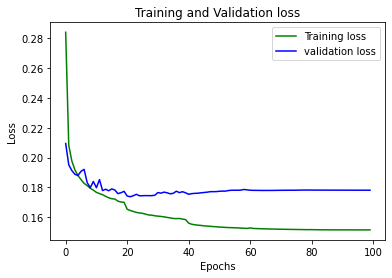

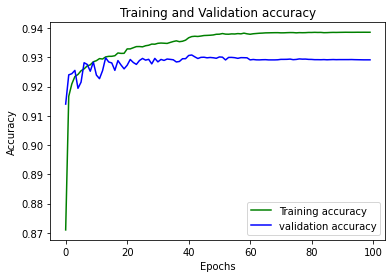

In [ ]:
import matplotlib.pyplot as plt

for key in history.history.keys():
    print(key)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
no_epochs = range(epochs)
plt.plot(no_epochs, loss_train, 'g', label='Training loss')
plt.plot(no_epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['binary_accuracy']
loss_val = history.history['val_binary_accuracy']
plt.plot(no_epochs, loss_train, 'g', label='Training accuracy')
plt.plot(no_epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]
model.fit(training_set, epochs=epochs,validation_data=val_dataset,callbacks=callbacks)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
4711/4711 [==============================] - 75s 16ms/step - loss: 0.0252 - binary_accuracy: 0.9924 - val_loss: 0.5137 - val_binary_accuracy: 0.9559
Epoch 2/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0250 - binary_accuracy: 0.9925 - val_loss: 0.5150 - val_binary_accuracy: 0.9560
Epoch 3/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0249 - binary_accuracy: 0.9925 - val_loss: 0.5183 - val_binary_accuracy: 0.9559
Epoch 4/100
4711/4711 [==============================] - 77s 16ms/step - loss: 0.0247 - binary_accuracy: 0.9926 - val_loss: 0.5204 - val_binary_accuracy: 0.9559
Epoch 5/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0246 - binary_accuracy: 0.9926 - val_loss: 0.5218 - val_binary_accuracy: 0.9558
Epoch 6/100
4711/4711 [==============================] - 77s 16ms/step - loss: 0.0244 - binary_accuracy: 